## Observations and Insights

1.)  Capomulin and Ramicane had the most data points throughout the study and they also had the least amount of variance when it came to the measurement of tumor volume.

2.)  Capomulin and Ramicane also had the lowest final tumor volume measurments.  Ramicane seemed to be the best drug option as it slightly beat out Capomulin with an average final tumor volume of only 36.19(mm3).

3.)  The worst drug proved to be Ketapril, as it had the highest final average tumor volume of 62.80(mm3)...which was actually higher than the placebo which had a final average tumor volume of 60.51(mm3).

4.)  There was a positive correlation between mouse weight and the average tumor volume...as it had a correlation coefficient of 0.84.

5.)  The drug with the widest range of results regarding average final tumor volume was Naftisol.  As the average final tumor volumes for that drug had a variance of 106 and a standard deviation of 10.3.

Based on the results it would appear that the best treatment option to reduce the size of tumors would be Ramicane and the worst option would be Ketapril.



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

combined_df = pd.merge(study_results,mouse_metadata, how = 'outer', on = 'Mouse ID')

# Display the data table for preview

cleaned_df = combined_df[combined_df['Timepoint']==0]

cleaned_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
10,f932,0,45.0,0,Ketapril,Male,15,29
11,g107,0,45.0,0,Ketapril,Female,2,29
19,a457,0,45.0,0,Ketapril,Female,11,30
22,c819,0,45.0,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1848,t565,0,45.0,0,Capomulin,Female,20,17
1858,i557,0,45.0,0,Capomulin,Female,1,24
1868,m957,0,45.0,0,Capomulin,Female,3,19
1878,f966,0,45.0,0,Capomulin,Male,16,17


In [2]:
#Getting total mice count

total_mice = len(cleaned_df['Mouse ID'].unique())

total_mice

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Locate the duplicate ID.

duplicate_mouse_ids = cleaned_df.loc[cleaned_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_mouse_ids


array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID.

mouse_g989_df = combined_df[combined_df['Mouse ID'].isin(duplicate_mouse_ids) == True]

mouse_g989_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

cleaned_df = combined_df[combined_df['Mouse ID'].isin(duplicate_mouse_ids) == False]

cleaned_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [9]:
# Check the number of mice in the clean DataFrame.

total_mice = len(cleaned_df['Mouse ID'].unique())

total_mice

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean_tumor_volume = cleaned_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']

median_tumor_volume = cleaned_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']

tumor_volume_variance = cleaned_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']

tumor_volume_stdv = cleaned_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']

tumor_volume_stderr = cleaned_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

In [11]:
# Use this straighforward method, create multiple series and put them all in a dataframe at the end.

drug_summary_df = pd.DataFrame ({'Mean Tumor Volume': mean_tumor_volume,
                                 'Median Tumor Volume': median_tumor_volume,
                                 'Tumor Volume Variance': tumor_volume_variance,
                                 'Tumor Volume Std. Dev.': tumor_volume_stdv,
                                 'Tumor Volume Std. Err.': tumor_volume_stderr,})

drug_summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use method to produce everything with a single groupby function

cleaned_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean','median','var', 'std', 'sem']})


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

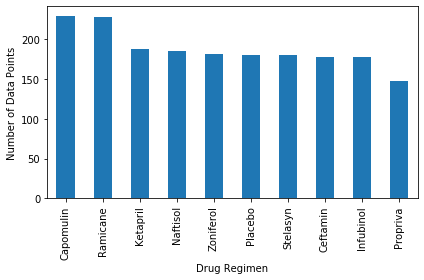

In [13]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

treatment_count = cleaned_df.groupby('Drug Regimen').count()[['Mouse ID']]

treatment_count = treatment_count.sort_values(by = ['Mouse ID'], ascending = False)

treatment_count.plot(kind = "bar", legend = False)

plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')

plt.tight_layout()

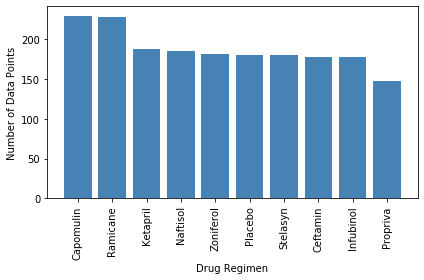

In [14]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

x_axis = np.arange(len(treatment_count))
tick_locations = [value for value in x_axis]

plt.bar(x_axis, treatment_count["Mouse ID"], color = 'steelblue', align = 'center')
plt.xticks(tick_locations, treatment_count.index, rotation = 'vertical')

plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')

plt.tight_layout()

Text(0, 0.5, 'Sex')

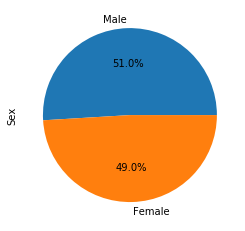

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mice_gender_df = cleaned_df[['Mouse ID', 'Sex']]

mice_group = mice_gender_df.groupby('Sex')

mice_gender_df = mice_group.count().sort_values(by = ['Mouse ID'], ascending = False)

mice_gender_df.plot(kind = "pie", legend = False, subplots = True, autopct="%1.1f%%")

plt.ylabel('Sex')


Text(0, 0.5, 'Sex')

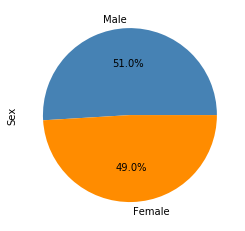

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

genders = ['Male', 'Female']

genders_total = mice_gender_df['Mouse ID']

colors = ['steelblue', 'darkorange']

plt.pie(genders_total, labels = genders, colors = colors, autopct = "%1.1f%%")

plt.ylabel('Sex')


## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across each of the treatment regimens: 
# Start by getting the last (greatest) timepoint for each mouse

final_tumor_volume = cleaned_df.groupby('Mouse ID').max()['Timepoint']

final_tumor_volume_df = pd.DataFrame(final_tumor_volume)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

final_tumor_merge_df = pd.merge(final_tumor_volume_df, cleaned_df, on = ('Mouse ID', 'Timepoint'), how='left')

final_tumor_merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [18]:
# Put 4 treatment names into a list for use with a for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create a empty list to fill with tumor vol data (for plotting) (hint: each element of the list will be series)
tumor_vol_list = []

# For each treatment in the list, calculate the IQR and quantitatively 
# determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    final_tumor_volume = final_tumor_merge_df.loc[final_tumor_merge_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # add subset to tumor volume data list
    
    tumor_vol_list.append(final_tumor_volume)
    
    # Determine outliers using upper and lower bounds
    
    quartiles = final_tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers = final_tumor_volume.loc[(final_tumor_volume < lower_bound) | (final_tumor_volume > upper_bound)]
    
    print(f"{drug}'s potential outliers: {outliers}")
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


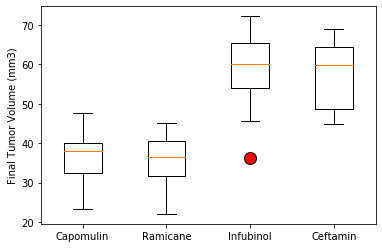

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

outliers_style = dict(marker='o', markerfacecolor='red', markersize=12)

fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_vol_list, flierprops = outliers_style, labels = treatment_list)

plt.show()

## Line and Scatter Plots

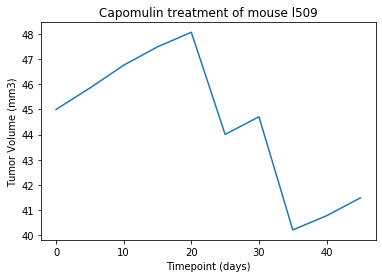

In [20]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

capomulin_df = combined_df[combined_df['Drug Regimen']=='Capomulin']

mouse_l509 = capomulin_df[capomulin_df['Mouse ID']=='l509']

mouse_l509_tumor_vol = mouse_l509['Tumor Volume (mm3)']

plt.plot(mouse_l509.Timepoint, mouse_l509_tumor_vol)

plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')

plt.show()

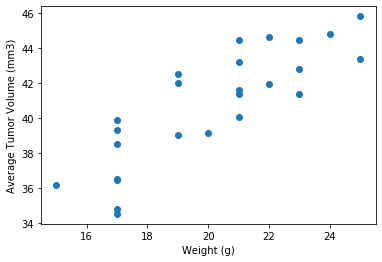

In [21]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin_mean_tumor = capomulin_df.groupby('Mouse ID').mean()['Tumor Volume (mm3)']

capomulin_mouse_weight = capomulin_df.groupby('Mouse ID').mean()['Weight (g)']

plt.scatter(capomulin_mouse_weight, capomulin_mean_tumor)

plt.xlabel('Weight (g)')

plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


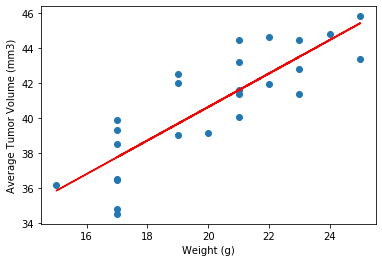

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = linregress(capomulin_mouse_weight, capomulin_mean_tumor)
regress_values = capomulin_mouse_weight * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(capomulin_mouse_weight,capomulin_mean_tumor)
plt.plot(capomulin_mouse_weight,regress_values,"r-")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

print(f"The correlation between mouse weight and the average tumor volume is {round(rvalue,2)}")
plt.show()


In [23]:
#I wanted to run a final summary statistics table on the final tumor volumes based on each drug regimen.
#this was just to help me make better observations on the results and trends.

final_tumor_merge_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean','median','var', 'std', 'sem']})

Tumor Volume (mm3)                                            
                           mean     median         var        std       sem
Drug Regimen                                                               
Capomulin             36.667568  38.125164   32.663378   5.715188  1.143038
Ceftamin              57.753977  59.851956   69.982735   8.365568  1.673114
Infubinol             58.178246  60.165180   74.010875   8.602957  1.720591
Ketapril              62.806191  64.487812   98.921330   9.945920  1.989184
Naftisol              61.205757  63.283288  106.029927  10.297083  2.059417
Placebo               60.508414  62.030594   78.759797   8.874672  1.774934
Propriva              56.493884  55.591622   70.822755   8.415626  1.717832
Ramicane              36.191390  36.561652   32.166354   5.671539  1.134308
Stelasyn              61.001707  62.192350   90.331586   9.504293  1.940056
Zoniferol             59.181258  61.840058   76.862027   8.767099  1.753420